In [3]:
%matplotlib nbagg

Don't worry about the next few lines. They are just setup stuff

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def plotSpectralResponse (band, x, title, ax):
    ax.plot(x, band)
    ax.set_title (title, fontsize=16, fontweight="bold", pad=8, fontname='Times New Roman')
    ax.set_ylabel("Radiance",  fontsize=13)
    ax.set_xlabel ("Wavelength (nm)",  fontsize=13)
    

### Setting up data
The data is originally a 3D array of the from 145x145x200, where 200 represents the spectral bands. 145x145 is the grid for the picture. To simplify the use of the array, the data shape is changed to 200x145x145. 

You can visualize this as a cube where 200 is the depth of the cube, while 145x145 represents the length and the width. 

In [25]:
data = np.load('indianpinearray.npy')
data = np.transpose(data, (2,0,1))
wave = np.loadtxt('wavelength.txt')[20:]

#changing from callibrated value to radiance
radianceData = (data-1000)/500.

### Visualizing Bands
The data we have is includes band the range 360 nm to 2500 nm. To visualize the grid at each band, we first extract the desired band from the datacube, and then we can plot the grid. 

Use the slider to switch between the different bands

<IPython.core.display.Javascript object>


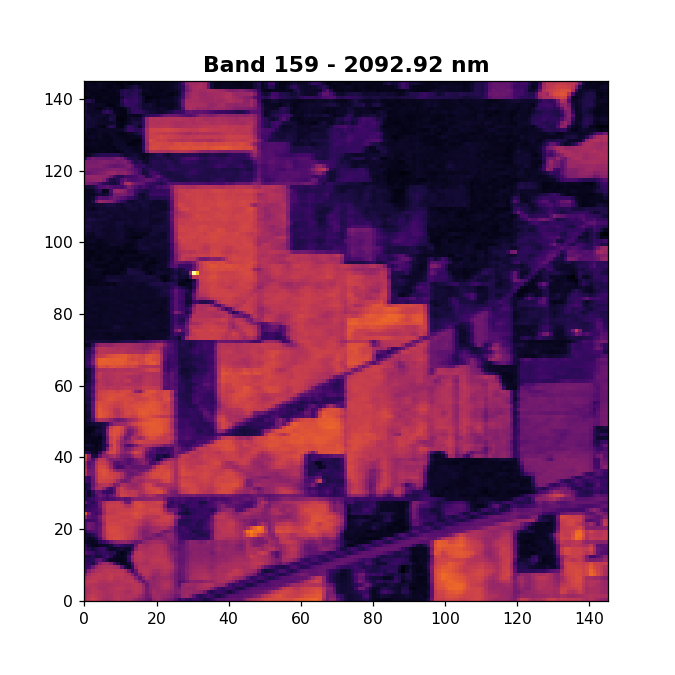

interactive(children=(IntSlider(value=1, description='Band', max=200, min=1), Output()), _dom_classes=('widget…

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

def updatePlot (band):
    ax.pcolormesh(data[band-1], cmap='inferno')
    ax.set_title("Band "+ str(band) + " - " + str(wave[band-1]) + " nm", fontsize=14, fontweight="bold")
    
trial = widgets.IntSlider(min=1, max=200, value = 1, description="Band")
widgets.interactive(updatePlot, band=trial)

### Spectral Response
The above visualized the data as the grid at each spectral band. A different way to visualize the data is to get the spectral response of at each pixel of the data. Use the slider to get the spectral response at different pixels

<IPython.core.display.Javascript object>


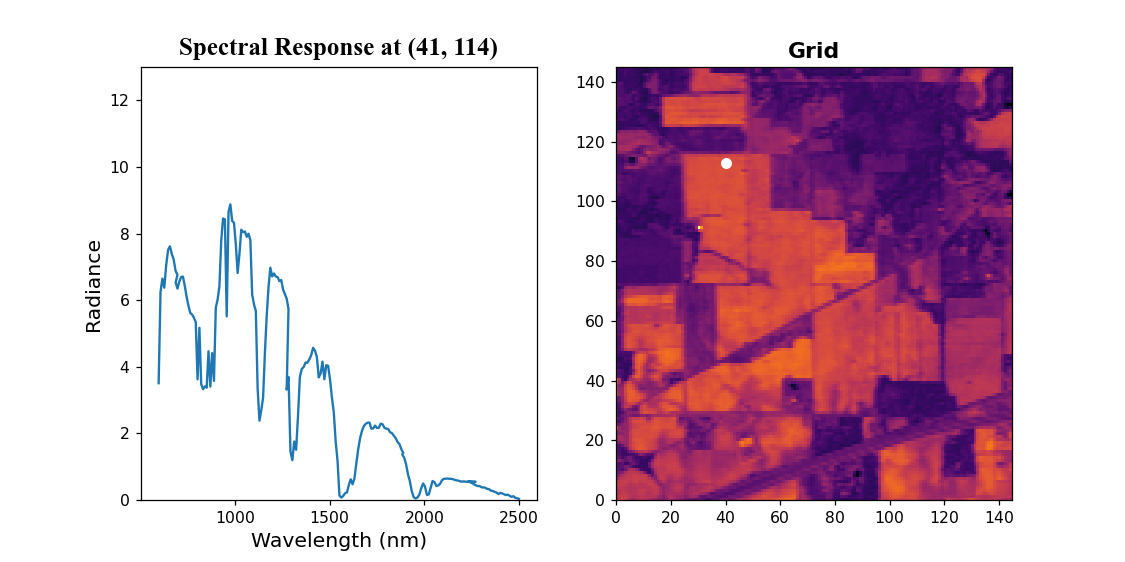

interactive(children=(IntSlider(value=1, description='x', max=145, min=1), IntSlider(value=1, description='y',…

In [30]:
figPixel = plt.figure(figsize=(10, 5))

axPixel = [0]*2
axPixel[0] = figPixel.add_subplot(121)
axPixel[1] = figPixel.add_subplot(122)

def pixelPlot(x, y):
    axPixel[0].clear()
    axPixel[0].set_ylim(bottom=radianceData.min(), top=13)
    plotSpectralResponse(radianceData[:,x-1,y-1], wave, "Spectral Response at (" + str(x) + ", " + str(y) + ")", axPixel[0])
    
    axPixel[1].pcolormesh(data[135-1], cmap='inferno')
    axPixel[1].set_title("Grid",fontsize=14, fontweight="bold")
    axPixel[1].scatter(x-1,y-1, color='white')
    

x = widgets.IntSlider(min=1, max=145, value = 1, description="x")
y = widgets.IntSlider(min=1, max=145, value = 1, description="y")
widgets.interactive(pixelPlot, x=x, y=y)

We can try finding the spectral response over the entire grid

<IPython.core.display.Javascript object>


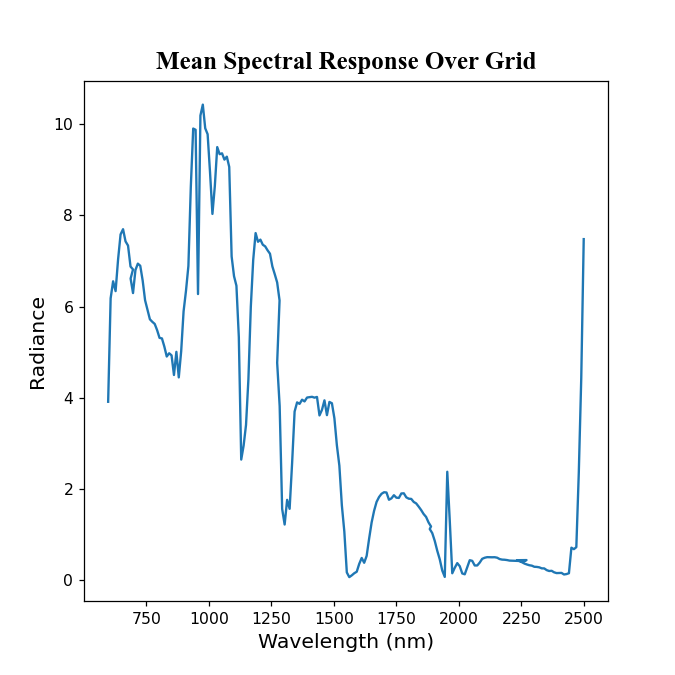

In [16]:
#mean spectral response over the whole area
meanSpectral = np.mean(radianceData, axis =1) #averaging the column leaving us with a 2d array of form 200x145
meanSpectral = np.mean(meanSpectral, axis=1) #averaging the column leaving us with a vector of length 200

fig, ax3 = plt.subplots(figsize=(6,6))
plotSpectralResponse(meanSpectral, wave, "Mean Spectral Response Over Grid", ax3)

The main function we are using is np.mean(data, axis). The axis refers to which direction you want to average you data. In a 3d array, axis = 0 refers to the depths, so if you do np.mean(data, axis =0) you will be left with a 2d array of form 145x145
axis = 1 refers to columns and axis = 2 refers to rows

In a 2d array, axis=0 refers to rows and axis = 1 refers to columns

Small trial code to get people familiar with the function

Your mission should you choose to accept it is to find the spectral response over the area define by a square with vertices .....